In [108]:
import pandas as pd

df = pd.read_csv('Downloads/adult_income.csv')
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [109]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [110]:
df.income.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [111]:
df.income = df.income.str.replace('.', '')
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

df['workclass'] = df.workclass.fillna('?')
df['occupation'] = df.occupation.fillna('?')
df['native_country'] = df['native-country'].fillna('?')

del df['native-country']

In [112]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
native_country    0
dtype: int64

In [113]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
income             int64
native_country    object
dtype: object

In [114]:
numeric_columns = ['age', 'fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

string_columns = [i for i in df.columns if i not in numeric_columns and i != 'income'] # exclude income as it is y

In [115]:
from sklearn.model_selection import train_test_split

target_column = 'income'


df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)


y_train = df_train[target_column]
y_val = df_val[target_column]
y_test = df_test[target_column]


del df_train[target_column]
del df_val[target_column]
del df_test[target_column]

In [116]:
from sklearn.feature_extraction import DictVectorizer

# Initialize DictVectorizer with sparse=True
dv = DictVectorizer(sparse=True)

# Convert dataframes to dictionaries and apply DictVectorizer
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model_LR = LogisticRegression(max_iter=1000, random_state=42)
model_LR.fit(X_train_scaled, y_train)


y_pred_proba = model_LR.predict_proba(X_val_scaled)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(accuracy, precision, recall, roc_auc)

0.8577131743269526 0.7482776894541601 0.6067898581865062 0.9110438010400326


In [119]:
import numpy as np
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 21)  # Creates 21 evenly spaced thresholds from 0 to 1

logistic_accuracies = {'accs': [], 'vals': []}

for t in thresholds:
    # Assuming y_pred contains probability values, you can threshold it
    acc = accuracy_score(y_val, y_pred_proba >= t)
    logistic_accuracies['accs'].append(t)
    logistic_accuracies['vals'].append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.238
0.05 0.636
0.10 0.718
0.15 0.767
0.20 0.797
0.25 0.819
0.30 0.836
0.35 0.847
0.40 0.854
0.45 0.857
0.50 0.858
0.55 0.856
0.60 0.852
0.65 0.846
0.70 0.839
0.75 0.829
0.80 0.821
0.85 0.811
0.90 0.802
0.95 0.791
1.00 0.762


In [120]:
# 5. Make predictions and calculate metrics
y_pred_proba = model_LR.predict_proba(X_val_scaled)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

# 6. Get feature importance (coefficients)
feature_names = dv.get_feature_names_out()  # Get feature names from the vectorizer
coefficients = model.coef_.flatten()  # Flatten the coefficients to a 1D array

# Combine feature names and coefficients into a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort features by the absolute value of the coefficients
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top 10 most important features
print("\nTop 10 features by importance:")
print(feature_importance.head(10))


Accuracy: 0.8577, Precision: 0.7483, Recall: 0.6068

Top 10 features by importance:
                              Feature  Coefficient  Importance
1                        capital-gain     2.412365    2.412365
26       marital-status=Never-married    -0.675740    0.675740
24  marital-status=Married-civ-spouse     0.548742    0.548742
97                         sex=Female    -0.405300    0.405300
21                     hours-per-week     0.379923    0.379923
94             relationship=Own-child    -0.367675    0.367675
0                                 age     0.352984    0.352984
22            marital-status=Divorced    -0.345048    0.345048
15                  education=HS-grad    -0.341632    0.341632
88                         race=Black    -0.322860    0.322860


### Decision tree

In [141]:
target_column = 'income'


df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)


y_train = df_train[target_column]
y_val = df_val[target_column]
y_test = df_test[target_column]


del df_train[target_column]
del df_val[target_column]
del df_test[target_column]

# Initialize DictVectorizer with sparse=True
dv = DictVectorizer(sparse=True)

# Convert dataframes to dictionaries and apply DictVectorizer
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_scaled, y_train)

# Step 7: Make predictions and calculate metrics
y_pred_proba = model_DT.predict_proba(X_val_scaled)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)


accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(accuracy, precision, recall, roc_auc)



0.8173815129491248 0.6149936467598475 0.6239793725827245 0.750959316724887


In [142]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train_scaled, y_train)
    y_pred_proba = dt.predict_proba(X_val_scaled)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)
    auc = roc_auc_score(y_val, y_pred_proba)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.768
   2 -> 0.840
   3 -> 0.862
   4 -> 0.875
   5 -> 0.888
   6 -> 0.900
  10 -> 0.900
  15 -> 0.857
  20 -> 0.818
None -> 0.748


In [143]:
for depth in range(10,16,1):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train_scaled, y_train)
    y_pred_proba = dt.predict_proba(X_val_scaled)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)
    auc = roc_auc_score(y_val, y_pred_proba)
    print('%4s -> %.3f' % (depth, auc))

  10 -> 0.899
  11 -> 0.891
  12 -> 0.886
  13 -> 0.874
  14 -> 0.870
  15 -> 0.857


In [151]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=m)
    dt.fit(X_train_scaled, y_train)
    y_pred_proba = dt.predict_proba(X_val_scaled)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)
    auc = roc_auc_score(y_val, y_pred_proba)
    print('%s -> %.3f' % (m, auc))

1 -> 0.906
5 -> 0.906
10 -> 0.905
15 -> 0.906
20 -> 0.907
50 -> 0.906
100 -> 0.905
200 -> 0.904


In [150]:
for m in range(2,15,1):
    dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=m)
    dt.fit(X_train_scaled, y_train)
    y_pred_proba = dt.predict_proba(X_val_scaled)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)
    auc = roc_auc_score(y_val, y_pred_proba)
    print('%s -> %.3f' % (m, auc))

2 -> 0.907
3 -> 0.907
4 -> 0.907
5 -> 0.907
6 -> 0.907
7 -> 0.907
8 -> 0.906
9 -> 0.905
10 -> 0.905
11 -> 0.906
12 -> 0.906
13 -> 0.907
14 -> 0.907


In [149]:
for m in list(range(6,15,1)):
    print('depth: %s' % m)

    for s in list(range(1,20,1)):
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train_scaled, y_train)
        y_pred_proba = dt.predict_proba(X_val_scaled)[:, 1]
        y_pred = (y_pred_proba >= 0.5).astype(int)
        auc = roc_auc_score(y_val, y_pred_proba)
        print('%s -> %.3f' % (s, auc))
    
    print()

depth: 6
1 -> 0.900
2 -> 0.900
3 -> 0.901
4 -> 0.900
5 -> 0.900
6 -> 0.900
7 -> 0.900
8 -> 0.900
9 -> 0.900
10 -> 0.900
11 -> 0.900
12 -> 0.900
13 -> 0.900
14 -> 0.900
15 -> 0.900
16 -> 0.899
17 -> 0.899
18 -> 0.899
19 -> 0.899

depth: 7
1 -> 0.904
2 -> 0.905
3 -> 0.905
4 -> 0.905
5 -> 0.905
6 -> 0.905
7 -> 0.905
8 -> 0.905
9 -> 0.904
10 -> 0.904
11 -> 0.904
12 -> 0.903
13 -> 0.904
14 -> 0.904
15 -> 0.904
16 -> 0.904
17 -> 0.903
18 -> 0.903
19 -> 0.904

depth: 8
1 -> 0.906
2 -> 0.907
3 -> 0.907
4 -> 0.907
5 -> 0.906
6 -> 0.907
7 -> 0.907
8 -> 0.906
9 -> 0.905
10 -> 0.905
11 -> 0.906
12 -> 0.906
13 -> 0.907
14 -> 0.907
15 -> 0.906
16 -> 0.906
17 -> 0.906
18 -> 0.906
19 -> 0.907

depth: 9
1 -> 0.900
2 -> 0.904
3 -> 0.905
4 -> 0.905
5 -> 0.905
6 -> 0.905
7 -> 0.907
8 -> 0.907
9 -> 0.905
10 -> 0.904
11 -> 0.905
12 -> 0.906
13 -> 0.905
14 -> 0.906
15 -> 0.906
16 -> 0.906
17 -> 0.906
18 -> 0.906
19 -> 0.907

depth: 10
1 -> 0.898
2 -> 0.899
3 -> 0.900
4 -> 0.901
5 -> 0.902
6 -> 0.901
7 -> 0.9

### depth = 8, leaves = 2

In [154]:
### retrain

target_column = 'income'


df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)


y_train = df_train[target_column]
y_val = df_val[target_column]
y_test = df_test[target_column]


del df_train[target_column]
del df_val[target_column]
del df_test[target_column]

# Initialize DictVectorizer with sparse=True
dv = DictVectorizer(sparse=True)

# Convert dataframes to dictionaries and apply DictVectorizer
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, random_state = 1)
model_DT.fit(X_train_scaled, y_train)

# Step 7: Make predictions and calculate metrics
y_pred_proba = model_DT.predict_proba(X_val_scaled)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)


# Step 7: Make predictions and calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(accuracy, precision, recall, roc_auc)


0.8586344559320299 0.7894736842105263 0.5543618392780404 0.9072188626856457


## Random forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
target_column = 'income'

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)


y_train = df_train[target_column]
y_val = df_val[target_column]
y_test = df_test[target_column]


del df_train[target_column]
del df_val[target_column]
del df_test[target_column]

# Initialize DictVectorizer with sparse=True
dv = DictVectorizer(sparse=True)

# Convert dataframes to dictionaries and apply DictVectorizer
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model_RF = RandomForestClassifier(n_estimators=10, random_state = 42)
model_RF.fit(X_train_scaled, y_train)

y_pred_proba = model_RF.predict_proba(X_val_scaled)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)


accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(accuracy, precision, recall, roc_auc)

0.8483979936533934 0.6875 0.6665234207133649 0.8853692448358987


In [160]:
import numpy as np

aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train_scaled, y_train)
    y_pred_proba = rf.predict_proba(X_val_scaled)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)
    auc = roc_auc_score(y_val, y_pred_proba)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean -  auc_std, auc_mean + auc_std))

0.884 +- 0.002
0.882 -- 0.886


In [162]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train_scaled, y_train)
    y_pred_proba = rf.predict_proba(X_val_scaled)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)
    auc = roc_auc_score(y_val, y_pred_proba)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.886
20 -> 0.897
30 -> 0.901
40 -> 0.904
50 -> 0.905
60 -> 0.905
70 -> 0.906
80 -> 0.907
90 -> 0.907
100 -> 0.908
110 -> 0.908
120 -> 0.908
130 -> 0.908
140 -> 0.908
150 -> 0.908
160 -> 0.908
170 -> 0.908
180 -> 0.908
190 -> 0.908
200 -> 0.908


In [164]:

all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(80, 120, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train_scaled, y_train)
        y_pred_proba = rf.predict_proba(X_val_scaled)[:, 1]
        y_pred = (y_pred_proba >= 0.5).astype(int)
        auc = roc_auc_score(y_val, y_pred_proba)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()

depth: 5
80 -> 0.904
90 -> 0.904
100 -> 0.904
110 -> 0.905

depth: 10
80 -> 0.916
90 -> 0.916
100 -> 0.916
110 -> 0.916

depth: 20
80 -> 0.921
90 -> 0.921
100 -> 0.921
110 -> 0.921



In [166]:
all_aucs = {}

for m in range(3,11):
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(80, 110, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=20, min_samples_leaf=m, random_state=1)
        rf.fit(X_train_scaled, y_train)
        y_pred_proba = rf.predict_proba(X_val_scaled)[:, 1]
        y_pred = (y_pred_proba >= 0.5).astype(int)
        auc = roc_auc_score(y_val, y_pred_proba)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
80 -> 0.922
90 -> 0.922
100 -> 0.922

min_samples_leaf: 4
80 -> 0.922
90 -> 0.921
100 -> 0.922

min_samples_leaf: 5
80 -> 0.922
90 -> 0.922
100 -> 0.922

min_samples_leaf: 6
80 -> 0.921
90 -> 0.921
100 -> 0.921

min_samples_leaf: 7
80 -> 0.920
90 -> 0.920
100 -> 0.921

min_samples_leaf: 8
80 -> 0.921
90 -> 0.921
100 -> 0.921

min_samples_leaf: 9
80 -> 0.920
90 -> 0.920
100 -> 0.920

min_samples_leaf: 10
80 -> 0.920
90 -> 0.920
100 -> 0.920



In [167]:
## retrain random forest

target_column = 'income'

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)


y_train = df_train[target_column]
y_val = df_val[target_column]
y_test = df_test[target_column]


del df_train[target_column]
del df_val[target_column]
del df_test[target_column]

# Initialize DictVectorizer with sparse=True
dv = DictVectorizer(sparse=True)

# Convert dataframes to dictionaries and apply DictVectorizer
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model_RF = RandomForestClassifier(n_estimators=80, max_depth = 20, min_samples_leaf = 3, random_state =1)
model_RF.fit(X_train_scaled, y_train)
y_pred_proba = model_RF.predict_proba(X_val_scaled)[:, 1]

y_pred = (y_pred_proba >= 0.5).astype(int)


accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(accuracy, precision, recall, roc_auc)


0.8677449073600164 0.8017492711370262 0.5908895573700043 0.9224737771555698


In [102]:
auc

0.9202991892494624

### XGBoost

In [168]:
import xgboost as xgb

In [176]:
target_column = 'income'

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)


y_train = df_train[target_column]
y_val = df_val[target_column]
y_test = df_test[target_column]


del df_train[target_column]
del df_val[target_column]
del df_test[target_column]

# Initialize DictVectorizer with sparse=True
dv = DictVectorizer(sparse=True)

# Convert dataframes to dictionaries and apply DictVectorizer
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


dtrain = xgb.DMatrix(X_train_scaled, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val_scaled, label=y_val, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.5,
    'max_depth': 20,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

model_XGB = xgb.train(xgb_params, dtrain, num_boost_round=10)

dval_predict = xgb.DMatrix(X_val_scaled, feature_names=dv.feature_names_)

y_pred_proba = model_XGB.predict(dval_predict)

# Convert probabilities to binary predictions (threshold 0.5)
y_pred = (y_pred_proba >= 0.5).astype(int)



accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)  # Use probabilities for ROC AUC

# Print metrics
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC AUC: {roc_auc:.4f}")


Accuracy: 0.8634, Precision: 0.7566, Recall: 0.6291, ROC AUC: 0.9179


In [178]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [182]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

[0]	train-logloss:0.35792	val-logloss:0.38815
[5]	train-logloss:0.18332	val-logloss:0.29993
[10]	train-logloss:0.14536	val-logloss:0.29912
[15]	train-logloss:0.12994	val-logloss:0.30303
[20]	train-logloss:0.10806	val-logloss:0.31267
[25]	train-logloss:0.08756	val-logloss:0.32429
[30]	train-logloss:0.07851	val-logloss:0.33088
[35]	train-logloss:0.06572	val-logloss:0.34259
[40]	train-logloss:0.05884	val-logloss:0.35048
[45]	train-logloss:0.04970	val-logloss:0.36169
[50]	train-logloss:0.04561	val-logloss:0.36794
[55]	train-logloss:0.03988	val-logloss:0.37740
[60]	train-logloss:0.03679	val-logloss:0.38396
[65]	train-logloss:0.03313	val-logloss:0.39193
[70]	train-logloss:0.02990	val-logloss:0.39961
[75]	train-logloss:0.02819	val-logloss:0.40479
[80]	train-logloss:0.02611	val-logloss:0.40893
[85]	train-logloss:0.02503	val-logloss:0.41269
[90]	train-logloss:0.02387	val-logloss:0.41568
[95]	train-logloss:0.02260	val-logloss:0.42111
[99]	train-logloss:0.02154	val-logloss:0.42412


In [180]:

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-logloss:0.35792	val-logloss:0.38815
[10]	train-logloss:0.14536	val-logloss:0.29912
[20]	train-logloss:0.10806	val-logloss:0.31267
[30]	train-logloss:0.07851	val-logloss:0.33088
[40]	train-logloss:0.05884	val-logloss:0.35048
[50]	train-logloss:0.04561	val-logloss:0.36794
[60]	train-logloss:0.03679	val-logloss:0.38396
[70]	train-logloss:0.02990	val-logloss:0.39961
[80]	train-logloss:0.02611	val-logloss:0.40893
[90]	train-logloss:0.02387	val-logloss:0.41568
[99]	train-logloss:0.02154	val-logloss:0.42412


In [183]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [184]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

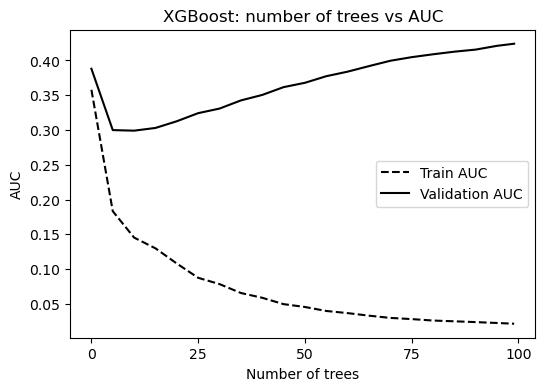

In [185]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

#### eta

In [186]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [187]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.93167
(0.93167, 50)


In [190]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)



In [191]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.93331
(0.93331, 170)


In [192]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [193]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.93352
(0.93352, 440)


In [194]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [195]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.92703
(0.92703, 499)


In [196]:
%%capture output

xgb_params = {
    'eta': 0.02,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [197]:
tree, _, aucs_val_eta_002 = parse_xgb_output(output)
print(max(aucs_val_eta_002))
print(max(zip(aucs_val_eta_002, tree)))

0.93234
(0.93234, 499)


In [198]:
%%capture output

xgb_params = {
    'eta': 0.06,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [199]:
tree, _, aucs_val_eta_006 = parse_xgb_output(output)
print(max(aucs_val_eta_006))
print(max(zip(aucs_val_eta_006, tree)))

0.93347
(0.93347, 410)


In [200]:
%%capture output

xgb_params = {
    'eta': 0.04,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [201]:
tree, _, aucs_val_eta_004 = parse_xgb_output(output)
print(max(aucs_val_eta_004))
print(max(zip(aucs_val_eta_004, tree)))

0.9333
(0.9333, 499)


#### max-depth

In [202]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [203]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.93081
(0.93081, 499)


In [204]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [205]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val_depth10))
print(max(zip(aucs_val_depth10, tree)))

0.93124
(0.93124, 220)


In [219]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [220]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val_depth10))
print(max(zip(aucs_val_depth10, tree)))

0.93372
(0.93372, 499)


#### min_child_weight

In [221]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [222]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.9322
(0.9322, 499)


In [245]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'min_child_weight': 4,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [246]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.93298
(0.93298, 470)


In [247]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [248]:
print(output)

[0]	train-auc:0.88377	val-auc:0.88804
[10]	train-auc:0.90536	val-auc:0.90703
[20]	train-auc:0.90877	val-auc:0.90990
[30]	train-auc:0.91233	val-auc:0.91307
[40]	train-auc:0.91543	val-auc:0.91558
[50]	train-auc:0.91743	val-auc:0.91726
[60]	train-auc:0.91978	val-auc:0.91935
[70]	train-auc:0.92226	val-auc:0.92151
[80]	train-auc:0.92425	val-auc:0.92333
[90]	train-auc:0.92570	val-auc:0.92462
[100]	train-auc:0.92703	val-auc:0.92567
[110]	train-auc:0.92818	val-auc:0.92653
[120]	train-auc:0.92953	val-auc:0.92748
[130]	train-auc:0.93071	val-auc:0.92830
[140]	train-auc:0.93188	val-auc:0.92929
[150]	train-auc:0.93284	val-auc:0.92989
[160]	train-auc:0.93370	val-auc:0.93041
[170]	train-auc:0.93444	val-auc:0.93089
[180]	train-auc:0.93512	val-auc:0.93113
[190]	train-auc:0.93558	val-auc:0.93139
[200]	train-auc:0.93619	val-auc:0.93170
[210]	train-auc:0.93666	val-auc:0.93182
[220]	train-auc:0.93713	val-auc:0.93204
[230]	train-auc:0.93764	val-auc:0.93218
[240]	train-auc:0.93793	val-auc:0.93225
[250]	train

In [252]:
### retrain with params

target_column = 'income'

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)


y_train = df_train[target_column]
y_val = df_val[target_column]
y_test = df_test[target_column]


del df_train[target_column]
del df_val[target_column]
del df_test[target_column]

# Initialize DictVectorizer with sparse=True
dv = DictVectorizer(sparse=True)

# Convert dataframes to dictionaries and apply DictVectorizer
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


dtrain = xgb.DMatrix(X_train_scaled, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val_scaled, label=y_val, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

model_XGB = xgb.train(xgb_params, dtrain, num_boost_round=500, verbose_eval=10)

dval_predict = xgb.DMatrix(X_val_scaled, feature_names=dv.feature_names_)

y_pred_proba = model_XGB.predict(dval_predict)

# Convert probabilities to binary predictions (threshold 0.5)
y_pred = (y_pred_proba >= 0.5).astype(int)



accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)  # Use probabilities for ROC AUC

# Print metrics
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8803, Precision: 0.8000, Recall: 0.6635, ROC AUC: 0.9337


### Final test

In [254]:
target_column = 'income'

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)


y_train_full = df_train_full[target_column]
y_test = df_test[target_column]


del df_train_full[target_column]
del df_test[target_column]

# Initialize DictVectorizer with sparse=True
dv = DictVectorizer(sparse=True)

# Convert dataframes to dictionaries and apply DictVectorizer
train_full_dicts = df_train_full.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_train_full = dv.fit_transform(train_full_dicts)
X_test = dv.transform(test_dicts)

scaler = StandardScaler(with_mean=False)

X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)


dtrain = xgb.DMatrix(X_train_full_scaled, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test_scaled, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

model_XGB = xgb.train(xgb_params, dtrain, num_boost_round=500, verbose_eval=10)

dtest_predict = xgb.DMatrix(X_test_scaled, feature_names=dv.feature_names_)

y_pred_proba = model_XGB.predict(dtest_predict)

# Convert probabilities to binary predictions (threshold 0.5)
y_pred = (y_pred_proba >= 0.5).astype(int)



accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Use probabilities for ROC AUC

# Print metrics
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC AUC: {roc_auc:.4f}")


Accuracy: 0.8748, Precision: 0.7850, Recall: 0.6571, ROC AUC: 0.9300


In [312]:
import pickle

# Save the XGBoost model
with open('Downloads/xgb_model.pkl', 'wb') as f:
    pickle.dump(model_XGB, f)

# Save the DictVectorizer and StandardScaler
with open('Downloads/dv_scaler.pkl', 'wb') as f:
    pickle.dump({'dict_vectorizer': dv, 'scaler': scaler}, f)

print("Model and transformers saved successfully.")


Model and transformers saved successfully.


In [313]:
import pickle
import xgboost as xgb
import pandas as pd
import numpy as np

# Load the XGBoost model
with open('Downloads/xgb_model.pkl', 'rb') as f:
    model_XGB = pickle.load(f)

# Load the DictVectorizer and StandardScaler
with open('Downloads/dv_scaler.pkl', 'rb') as f:
    data = pickle.load(f)
    dv = data['dict_vectorizer']
    scaler = data['scaler']

print("Model and transformers loaded successfully.")

# New data for prediction (example)
new_data = pd.DataFrame([
    {'age': 30, 'workclass': 'Private', 'education': 'Bachelors', 'capital-gain': 0, 'hours-per-week': 40}
])

# Process new data with DictVectorizer and StandardScaler
new_data_dicts = new_data.to_dict(orient='records')
X_new = dv.transform(new_data_dicts)
X_new_scaled = scaler.transform(X_new)

# Convert to DMatrix and predict
dnew = xgb.DMatrix(X_new_scaled, feature_names=dv.feature_names_)
y_pred_proba = model_XGB.predict(dnew)

# Convert probabilities to binary predictions
y_pred = (y_pred_proba >= 0.5).astype(int)

print(f"Prediction: {y_pred}, Probability: {y_pred_proba}")


Model and transformers loaded successfully.
Prediction: [0], Probability: [0.28638765]


### Feature importances

In [255]:
model_DT.feature_importances_

array([4.20826598e-02, 1.99364821e-01, 6.91009053e-02, 2.11840296e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.39807494e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.91753128e-04,
       3.14051406e-03, 3.59202922e-02, 0.00000000e+00, 2.81754779e-04,
       4.17197075e-01, 0.00000000e+00, 4.69233480e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.69457716e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [258]:

list(zip(dv.feature_names_, model_DT.feature_importances_))

[('age', 0.04208265984798438),
 ('capital-gain', 0.19936482079432616),
 ('capital-loss', 0.06910090533078697),
 ('education-num', 0.2118402956246839),
 ('education=10th', 0.0),
 ('education=11th', 0.0),
 ('education=12th', 0.0),
 ('education=1st-4th', 0.0),
 ('education=5th-6th', 0.0),
 ('education=7th-8th', 0.0),
 ('education=9th', 0.0),
 ('education=Assoc-acdm', 0.0),
 ('education=Assoc-voc', 0.0),
 ('education=Bachelors', 0.0),
 ('education=Doctorate', 0.000539807493746071),
 ('education=HS-grad', 0.0),
 ('education=Masters', 0.0),
 ('education=Preschool', 0.0),
 ('education=Prof-school', 0.0),
 ('education=Some-college', 0.0003917531281256726),
 ('fnlwgt', 0.0031405140564746232),
 ('hours-per-week', 0.03592029219468962),
 ('marital-status=Divorced', 0.0),
 ('marital-status=Married-AF-spouse', 0.00028175477938154216),
 ('marital-status=Married-civ-spouse', 0.4171970748019821),
 ('marital-status=Married-spouse-absent', 0.0),
 ('marital-status=Never-married', 0.00046923347989190714),


In [264]:
importances = list(zip(dv.feature_names_, model_DT.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance[:10]

,feature,gain
24,marital-status=Married-civ-spouse,0.417197
3,education-num,0.211840
1,capital-gain,0.199365
2,capital-loss,0.069101
0,age,0.042083
21,hours-per-week,0.035920
75,occupation=Exec-managerial,0.007151
20,fnlwgt,0.003141
105,workclass=Self-emp-not-inc,0.002950
96,relationship=Wife,0.002336


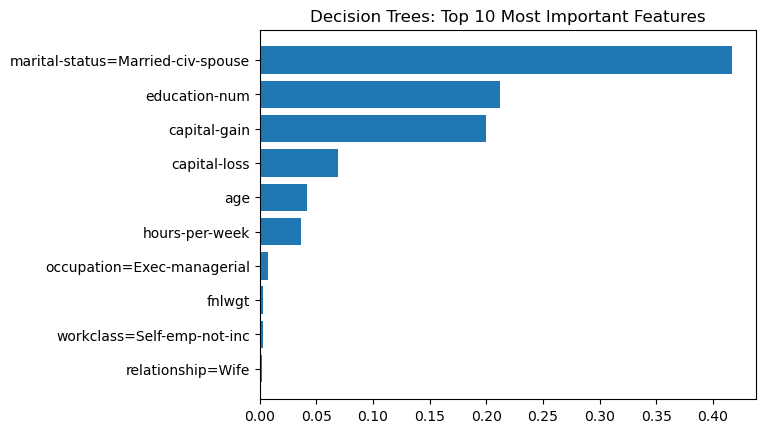

In [309]:
importances = list(zip(dv.feature_names_, model_DT.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance[:10]


num = len(df_importance[:10])
plt.barh(range(num), df_importance.gain[:10][::-1])
plt.yticks(range(num), df_importance.feature[:10][::-1])

plt.title('Decision Trees: Top 10 Most Important Features') 

plt.show()

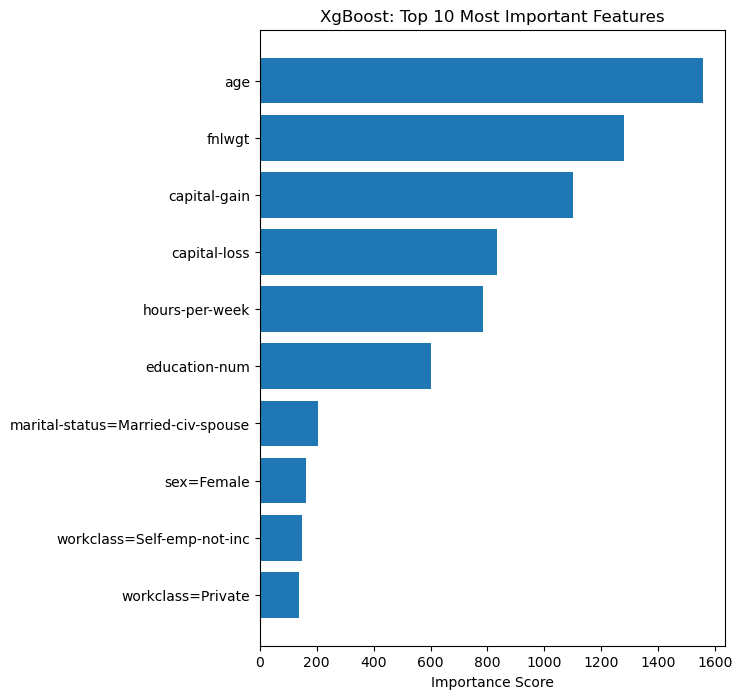

In [306]:
# Get feature importance and sort by value
scores = model_XGB.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)  # Sort descending

# Take only the top 10 features
top_10_scores = scores[:10]

# Extract names and values for the top 10
names, values = zip(*top_10_scores)  # Unpacks the first 10 tuples

# Plotting
plt.figure(figsize=(6, 8))
plt.barh(np.arange(len(values)), values)
plt.yticks(np.arange(len(names)), names)
plt.xlabel('Importance Score')
plt.title('XgBoost: Top 10 Most Important Features')  # Added title
plt.gca().invert_yaxis()  # Optional: invert y-axis for descending order

plt.show()


In [268]:
model_RF.feature_importances_

array([7.06277697e-02, 1.49838672e-01, 3.54204623e-02, 9.85457452e-02,
       1.22095488e-03, 2.29120890e-03, 2.98459877e-04, 1.63757138e-04,
       8.37715380e-04, 2.08470404e-03, 1.71686850e-03, 1.59052502e-03,
       1.77107379e-03, 1.95526249e-02, 4.41398208e-03, 9.82105214e-03,
       9.93346532e-03, 3.37833241e-05, 6.47956929e-03, 5.17595491e-03,
       2.83295987e-02, 5.53545430e-02, 9.75376464e-03, 1.50556984e-04,
       1.43408795e-01, 5.59803460e-04, 4.61638056e-02, 1.31208045e-03,
       1.75656175e-03, 7.98806403e-04, 2.02343511e-05, 2.17519859e-04,
       1.16565696e-04, 5.17491828e-05, 9.85983971e-05, 3.57527942e-05,
       5.50227621e-06, 4.59122462e-05, 1.62064629e-04, 2.14024918e-05,
       1.83578093e-04, 3.78508935e-05, 3.64613358e-05, 1.01475586e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.57587304e-04, 4.36460627e-05, 2.53989746e-05, 1.09174709e-04,
       5.12828638e-05, 7.68423485e-05, 1.32511654e-05, 2.49167506e-03,
      

In [307]:
importances = list(zip(dv.feature_names_, model_RF.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance[:10]


,feature,gain
1,capital-gain,0.149839
24,marital-status=Married-civ-spouse,0.143409
3,education-num,0.098546
91,relationship=Husband,0.086350
0,age,0.070628
21,hours-per-week,0.055355
26,marital-status=Never-married,0.046164
2,capital-loss,0.035420
75,occupation=Exec-managerial,0.033231
20,fnlwgt,0.028330


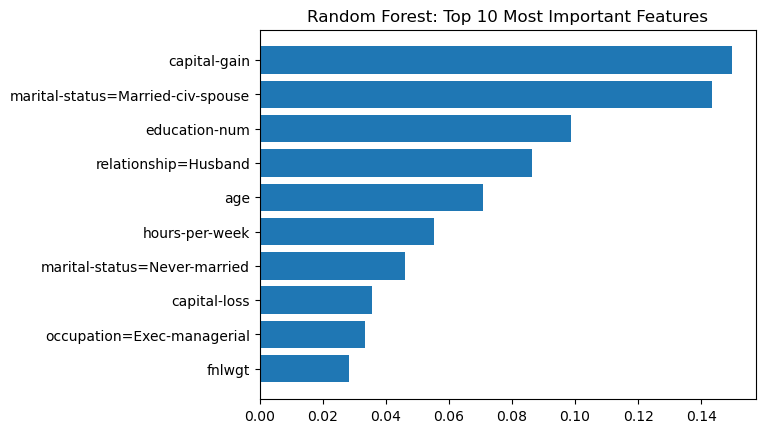

In [308]:
num = len(df_importance[:10])
plt.barh(range(num), df_importance.gain[:10][::-1])
plt.yticks(range(num), df_importance.feature[:10][::-1])

plt.title('Random Forest: Top 10 Most Important Features') 

plt.show()

In [302]:
scores = model_XGB.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('age', 1557.0),
 ('fnlwgt', 1281.0),
 ('capital-gain', 1101.0),
 ('capital-loss', 833.0),
 ('hours-per-week', 786.0),
 ('education-num', 602.0),
 ('marital-status=Married-civ-spouse', 203.0),
 ('sex=Female', 164.0),
 ('workclass=Self-emp-not-inc', 148.0),
 ('workclass=Private', 136.0),
 ('relationship=Wife', 129.0),
 ('occupation=Exec-managerial', 101.0),
 ('occupation=Prof-specialty', 94.0),
 ('relationship=Unmarried', 89.0),
 ('education=HS-grad', 83.0),
 ('race=White', 79.0),
 ('education=Some-college', 75.0),
 ('workclass=Local-gov', 72.0),
 ('relationship=Husband', 72.0),
 ('education=Bachelors', 72.0),
 ('marital-status=Never-married', 70.0),
 ('occupation=Sales', 69.0),
 ('native_country=United-States', 68.0),
 ('occupation=Transport-moving', 62.0),
 ('relationship=Not-in-family', 61.0),
 ('occupation=Adm-clerical', 61.0),
 ('occupation=Handlers-cleaners', 60.0),
 ('workclass=Self-emp-inc', 56.0),
 ('occupation=Farming-fishing', 53.0),
 ('occupation=Other-service', 50.0),
 ('o

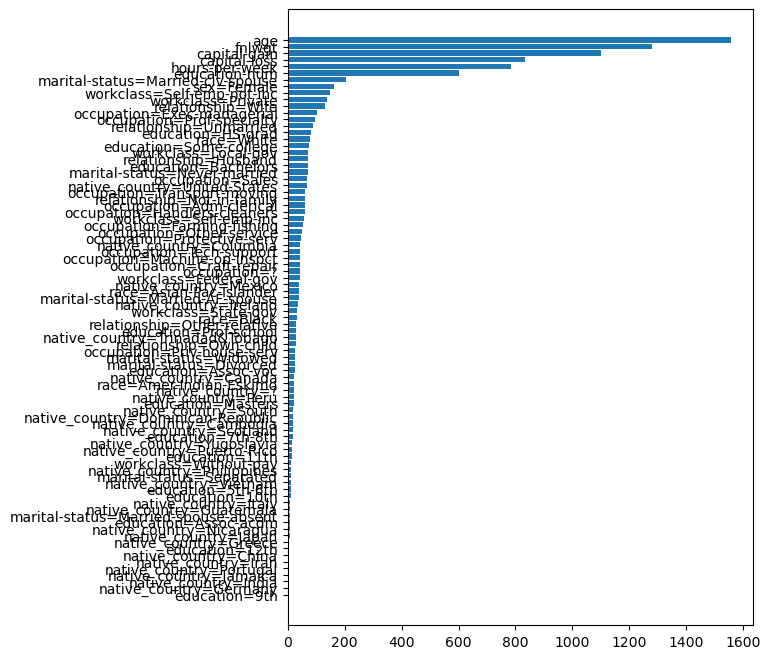

In [303]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

plt.figure(figsize=(6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()
plt.show()


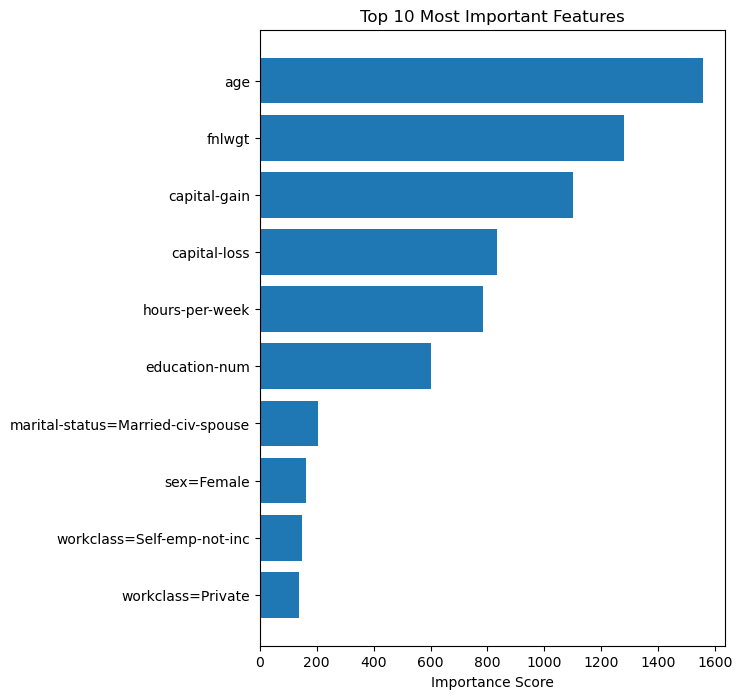

In [304]:
# Get feature importance and sort by value
scores = model_XGB.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)  # Sort descending

# Take only the top 10 features
top_10_scores = scores[:10]

# Extract names and values for the top 10
names, values = zip(*top_10_scores)  # Unpacks the first 10 tuples

# Plotting
plt.figure(figsize=(6, 8))
plt.barh(np.arange(len(values)), values)
plt.yticks(np.arange(len(names)), names)
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Optional: invert y-axis for descending order

plt.show()



In [350]:
# check if app working

import requests
import json

# URL where the Flask API is running
url = 'http://localhost:9696/predict'

# Example input data (same format as used in training)
data = {
    "age": 35,
    "workclass": "Private",
    "education": "Bachelors",
    "marital-status": "Married-civ-spouse",
    "occupation": "Exec-managerial",
    "relationship": "Husband",
    "race": "White",
    "sex": "Male",
    "capital-gain": 0,
    "capital-loss": 0,
    "hours-per-week": 40,
    "native-country": "United-States"
}

# Send a POST request with the input data
response = requests.post(url, json=data)

# Check if the request was successful
if response.status_code == 200:
    # Convert response to JSON and print
    result = response.json()
    print("Prediction:", result['prediction'])
    print("Probability:", result['probability'])
else:
    print("Error:", response.status_code, response.text)


Prediction: 1
Probability: 0.7097777128219604


In [347]:
from flask import jsonify

with open('Downloads/xgb_model.pkl', 'rb') as model_file:
    model_XGB = pickle.load(model_file)

with open('Downloads/dv_scaler.pkl', 'rb') as f:
    data = pickle.load(f)
    dv = data['dict_vectorizer']
    scaler = data['scaler']

def predict(data):
    # Get JSON data from request
    
    # Process input data using the DictVectorizer
    # data_dict = dv.transform([data])  # Input as dictionary

    # data = data.to_dict(orient='records')
    X_new = dv.transform(data)
    X_new_scaled = scaler.transform(X_new)

    # Convert to DMatrix for XGBoost prediction
    dmatrix = xgb.DMatrix(X_new_scaled, feature_names=dv.feature_names_)

    # Make prediction
    prediction_proba = model_XGB.predict(dmatrix)
    prediction = int(prediction_proba >= 0.5)  # Threshold at 0.5

    # Return prediction as JSON
    response = {
        'prediction': prediction,
        'probability': float(prediction_proba)
    }
    return response

In [348]:

data = {
    "age": 35,
    "workclass": "Private",
    "education": "Bachelors",
    "marital-status": "Married-civ-spouse",
    "occupation": "Exec-managerial",
    "relationship": "Husband",
    "race": "White",
    "sex": "Male",
    "capital-gain": 0,
    "capital-loss": 0,
    "hours-per-week": 40,
    "native-country": "United-States"
}

predict(data)

/var/folders/p1/s1722x1s68bb0br6wwgwpj_m0000gn/T/ipykernel_1109/797101892.py:26: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/p1/s1722x1s68bb0br6wwgwpj_m0000gn/T/ipykernel_1109/797101892.py:31: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



{'prediction': 1, 'probability': 0.7097777128219604}